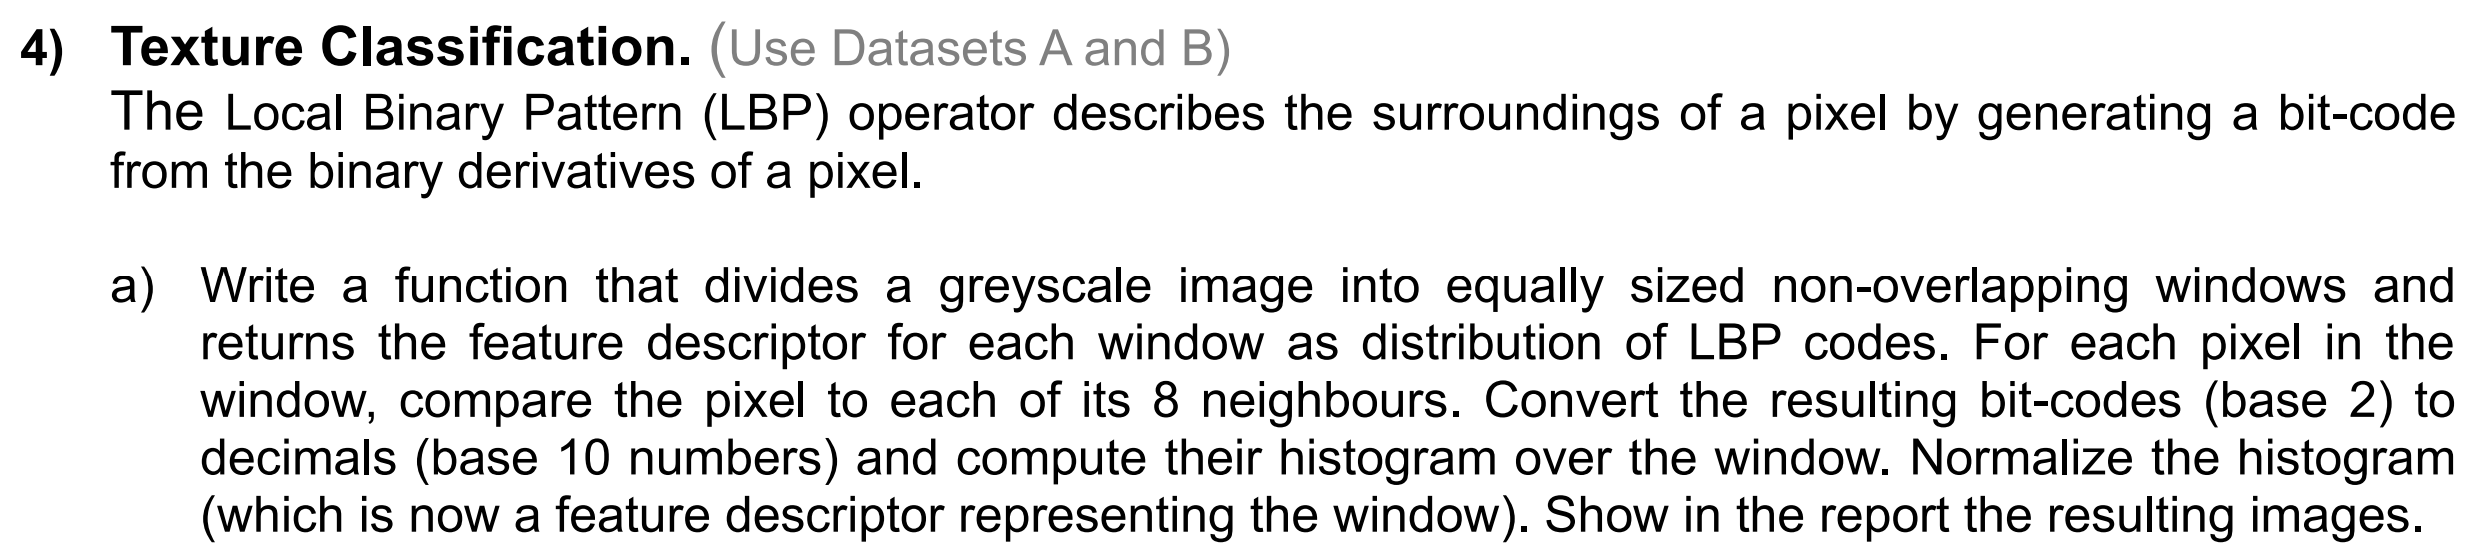

In [279]:
#import required packeges (PIL and Image ONLY used for read and write images)
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

In [280]:
import cv2

# load 4 rgb images two faces and two cars
face1_image = cv2.imread("Dataset//DatasetA//face-1.jpg")
face2_image = cv2.imread("Dataset//DatasetA//face-2.jpg")
car1_image = cv2.imread("Dataset//DatasetA//car-1.jpg") 
car2_image = cv2.imread("Dataset//DatasetA//car-2.jpg") 

# Convert the images to grayscale images

face1_gray_image = cv2.cvtColor(face1_image, cv2.COLOR_BGR2GRAY)
face1_image = np.array(face1_gray_image)

face2_gray_image = cv2.cvtColor(face2_image, cv2.COLOR_BGR2GRAY)
face2_image = np.array(face2_gray_image)


car1_gray_image = cv2.cvtColor(car1_image, cv2.COLOR_BGR2GRAY)
car1_image = np.array(car1_gray_image)

car2_gray_image = cv2.cvtColor(car2_image, cv2.COLOR_BGR2GRAY)
car2_image = np.array(car2_gray_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [281]:
# calculate LBP codes for each window in the given image for the window size
# plots histogram and normalised hostogram of each window
# plots the output picture which is classified by its texture 
# returns list of histograms of all windows LBP codes decimal values 

def LBP(image, window_size):
    
    # create a list to store normlised histogram of each window and return it at the end 
    list_of_histograms = []
    # create an output grid to store texture classified image
    output = np.zeros(image.shape)
    # create an output grid to store normalised values
    normalised_output = np.zeros(image.shape)
    
    # we iterate through image by step of the window size
    for i in range(0, image.shape[0],window_size):
        for j in range(0,image.shape[1],window_size):
            
            # we create a zero padded window 
            window = np.zeros((window_size+2, window_size+2))
            # we copy the pixel values from the original image into the padded window
            window[1:window.shape[0]-1, 1:window.shape[1]-1] = image[i:i + window_size, j:j + window_size]
            # we calculate LBP decimal codes for each window
            window_decimal_numbers = calculate_decimal_number(window)
            # find the max value of window for normalisation
            max_value = np.max(window_decimal_numbers)
            # we fill the normalised output grid with LBP normalised codes for that window
            normalised_output [i:i + window_size, j:j + window_size] = (window_decimal_numbers/max_value)
            # we fill the output grid with LBP codes for that window
            output [i:i + window_size, j:j + window_size] = window_decimal_numbers
            # we create a histogram and normalised histogram for each window and plot them
            normalised_histogram = create_histogram(window_decimal_numbers)
            # we append the normalised hostogram to the list to return and concatinate them for creating global descriptor
            # in the next part
            list_of_histograms.append(normalised_histogram)
            
    # plot the normalised texture classified image
    plt.imshow(output, cmap='gray')
    plt.title("output")
    plt.show()
    return list_of_histograms

In [282]:
# plots a histogram and normlaised histogram from LBP decimal codes of each window 
# returns normlaised histogram for using in the global descriptor step
def create_histogram(decimal_numbers):
    #find the max value for normlisation
    max_value = decimal_numbers.max()
    # create array of zeros to store frequency of color from 0 to 255 inside
    histogram = np.zeros((1,max_value+1))
    # we iterate through window decimal numbers 
    for i in range(decimal_numbers.shape[0]):
        for j in range(decimal_numbers.shape[1]):
            # we increase the counter of that color in the histogram
            histogram[0,decimal_numbers[i,j]] += 1
    
    # we normalise our histogram by dividing it by max value of it
    normalised_histogram = histogram[0]/np.max(histogram[0])
    # we plot both histograms
    plt.figure(figsize=(12, 4))
    plt.subplot(121) 
    plt.plot(histogram[0], color = 'gray')
    plt.subplot(122)
    plt.plot(normalised_histogram, color = 'green')
    plt.show()
    return normalised_histogram


In [283]:
# calculates LBP decimal codes for each window
def calculate_decimal_number(window):
    # create an array to store binary codes 
    binary_numbers = []
    # iterate through window
    for i in range(1, window.shape[0]-1):
        for j in range(1, window.shape[1]-1):
            # find a binary code for each member of window
            binary_number = ""
            center = window[i,j]
            # find 8 neighbours of each memebr of window
            neighbours =  [window[i-1, j-1],window[i-1, j],window[i-1, j+1],
                           window[i, j-1],window[i, j+1],
                           window[i+1, j-1],window[i+1, j],window[i+1, j+1]]
            #check if neighbour value is greater than center concat 1 otherwise 0
            for neighbour in neighbours:
                if neighbour > center:
                    binary_number += "1"
                else:
                    binary_number += "0"
            # append binary number to the list
            binary_numbers.append(binary_number)
            
    # change binary values to decimal values (base changes from 2 to 10)       
    decimal_numbers = [int(binary, 2) for binary in binary_numbers]
    #print("decimal numbers shape", len(decimal_numbers),window.shape[0], window.shape[1])
    # reshape array 
    np_array = np.array(decimal_numbers).reshape(window.shape[0]-2, window.shape[1]-2)

    # plot original and texture classified window
    plt.figure(figsize=(12, 4))
    plt.subplot(121)  
    plt.imshow(np_array, cmap='gray')
    plt.subplot(122)
    plt.imshow(window[1:window.shape[0]-1, 1:window.shape[0]-1], cmap='gray')
    plt.show()
    return np_array
                

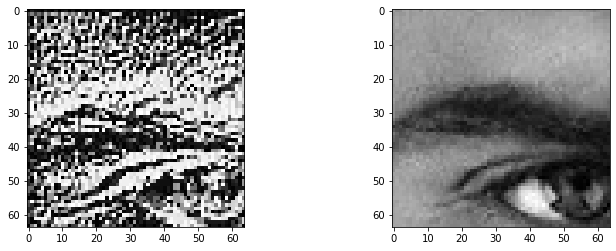

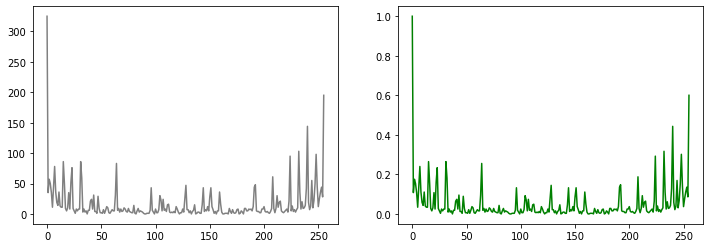

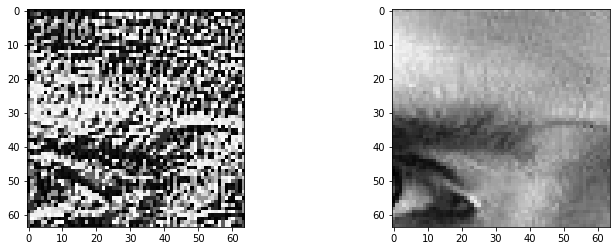

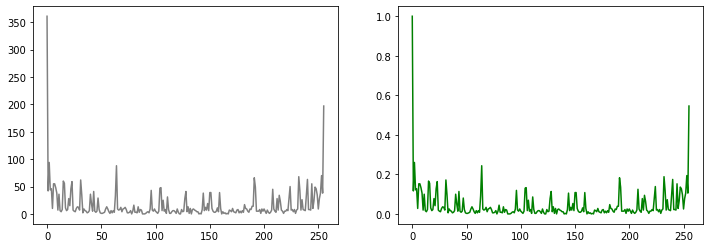

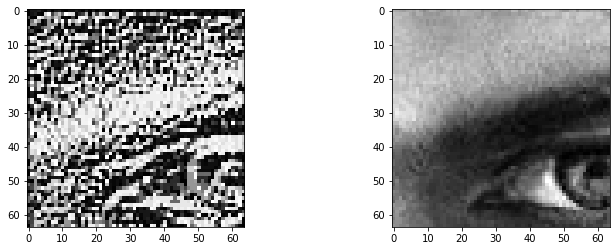

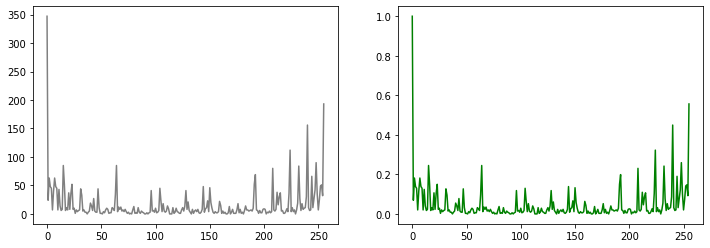

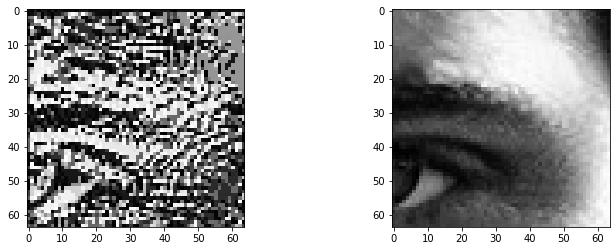

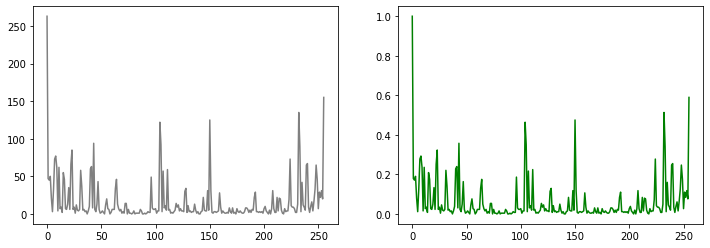

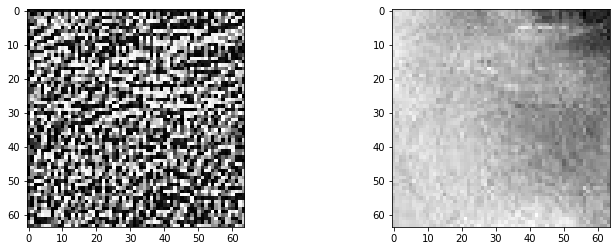

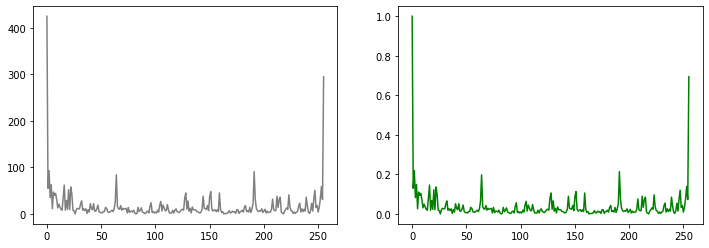

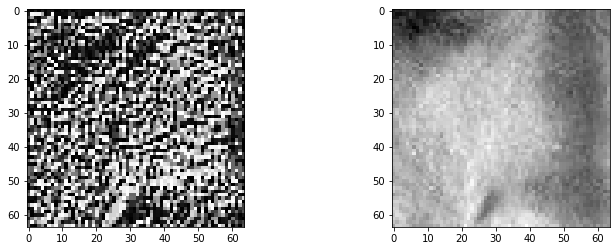

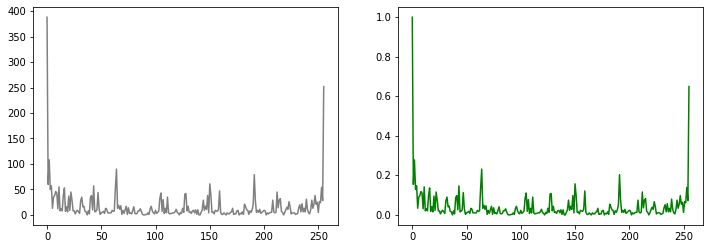

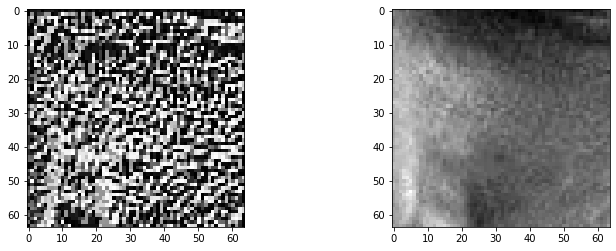

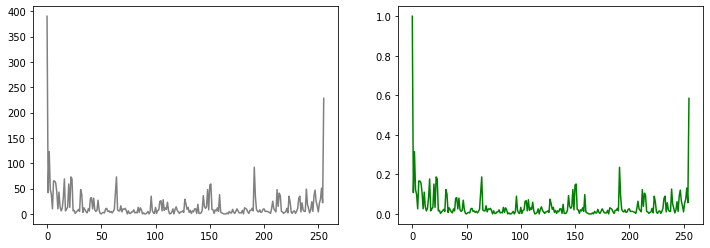

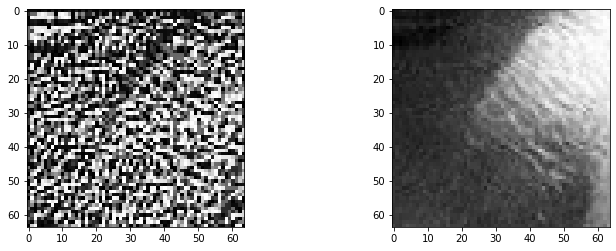

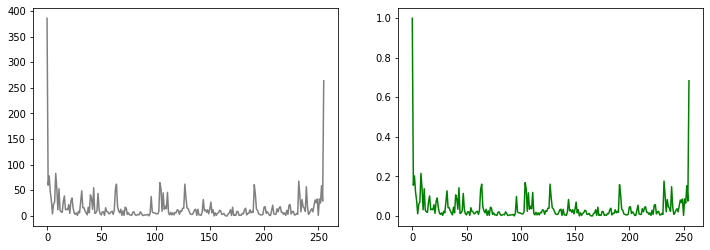

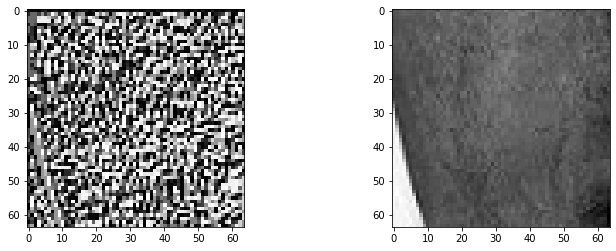

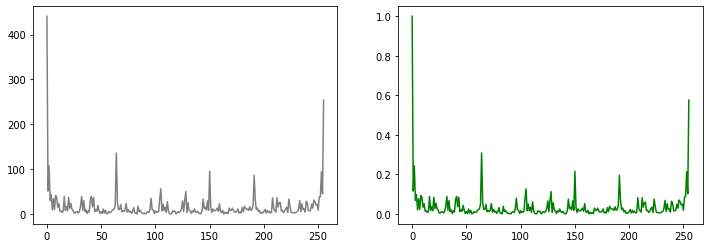

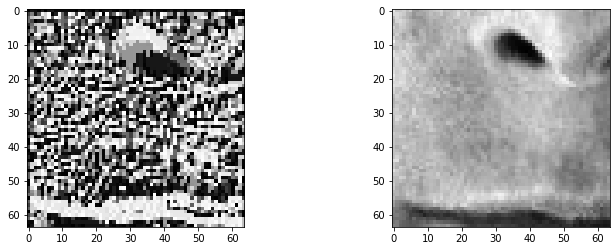

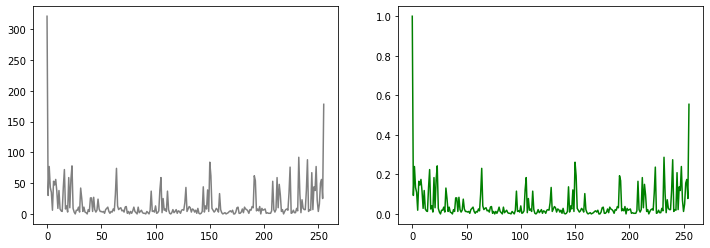

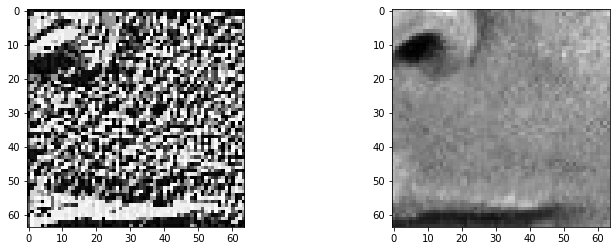

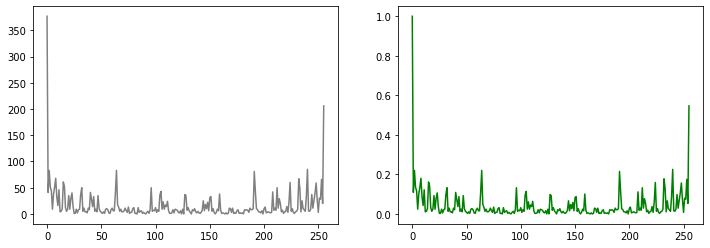

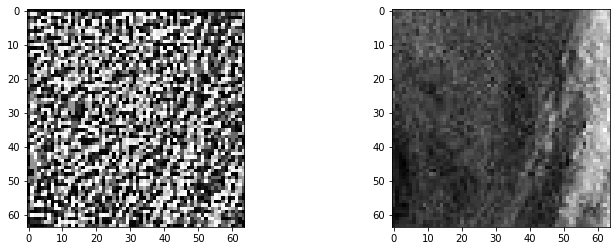

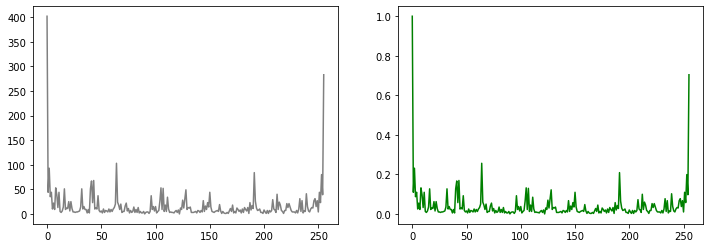

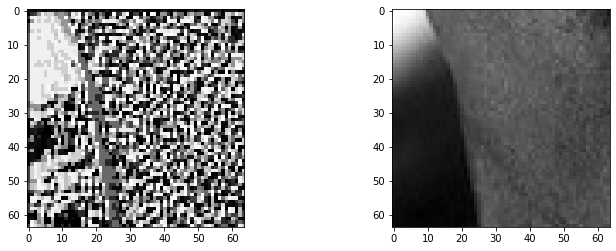

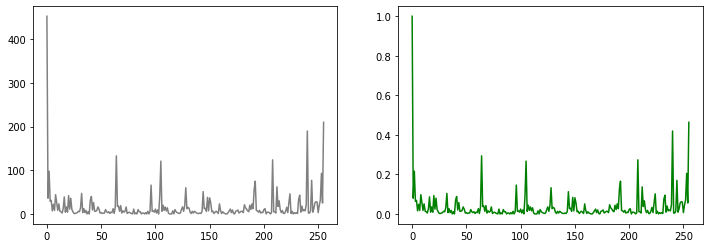

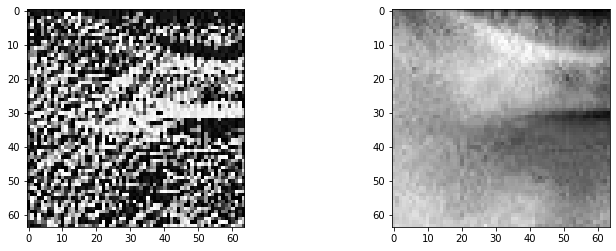

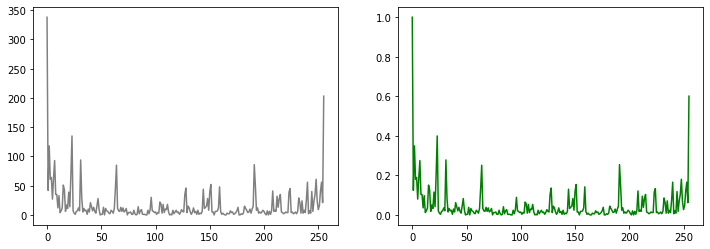

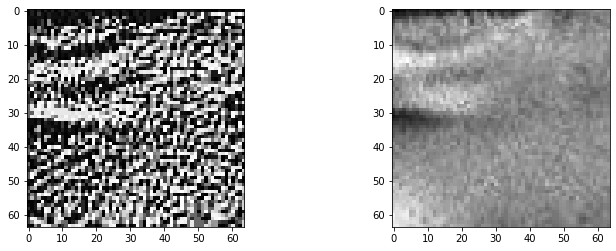

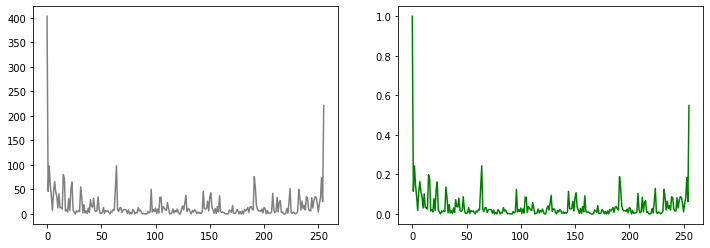

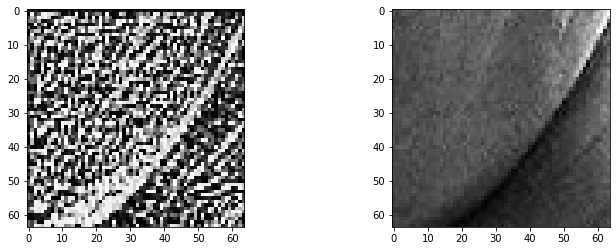

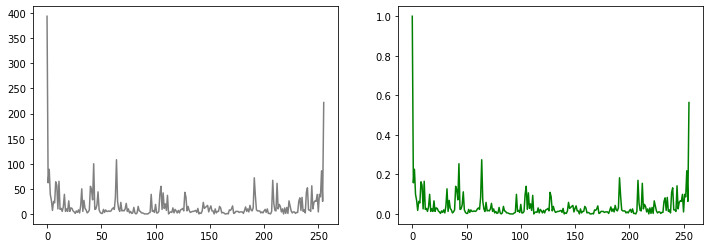

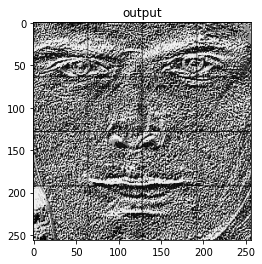

In [284]:
# calculate LBP codes histograms for 4 images 
window_size = 64
face1_histograms_list = LBP(face1_image,window_size)

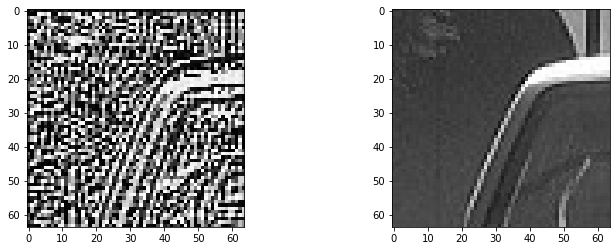

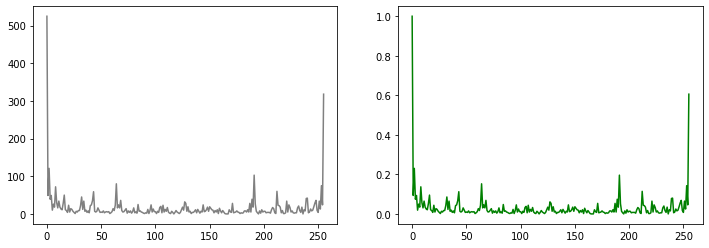

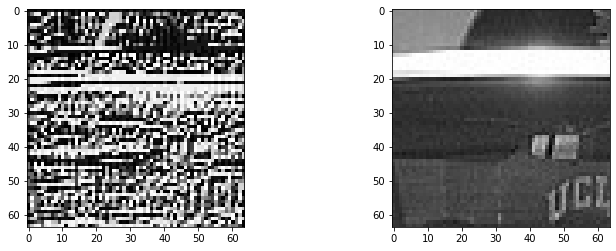

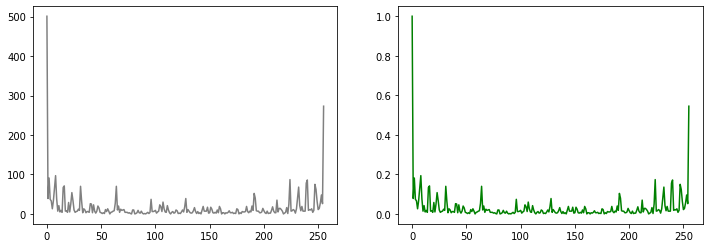

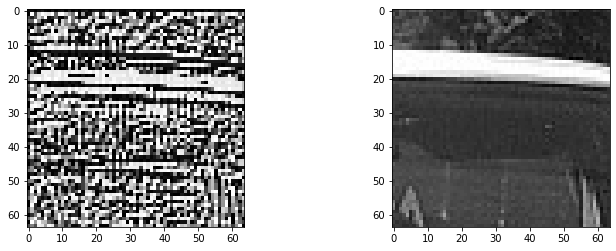

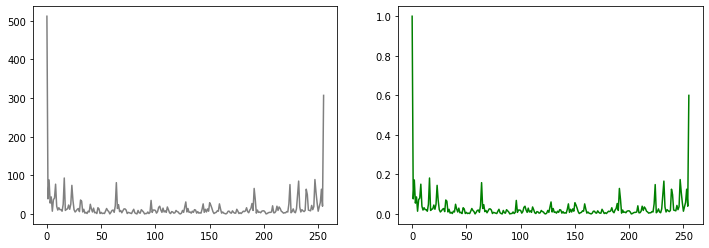

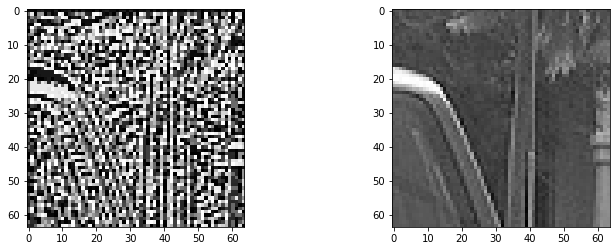

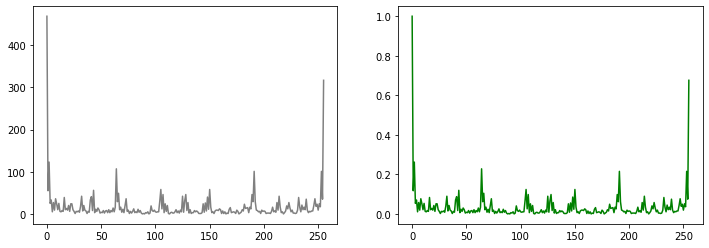

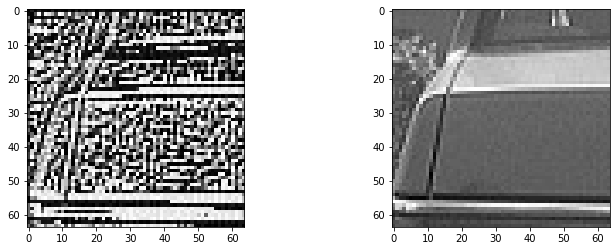

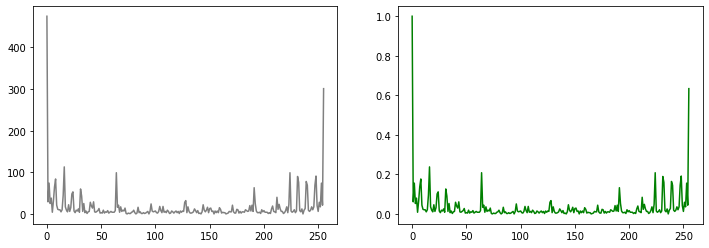

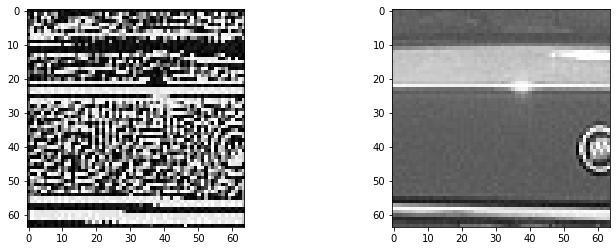

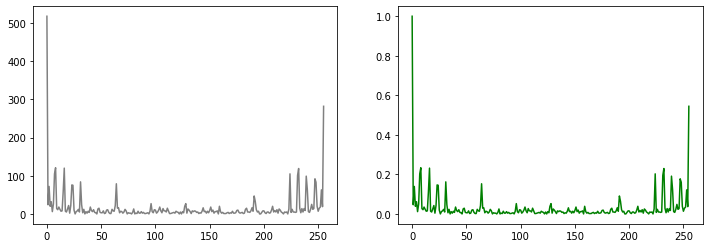

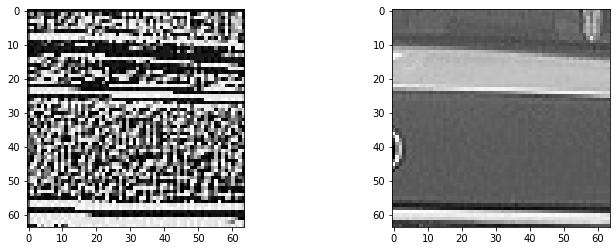

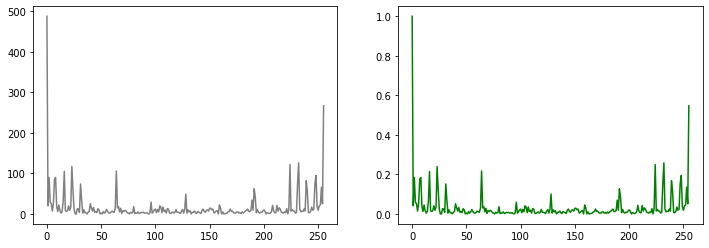

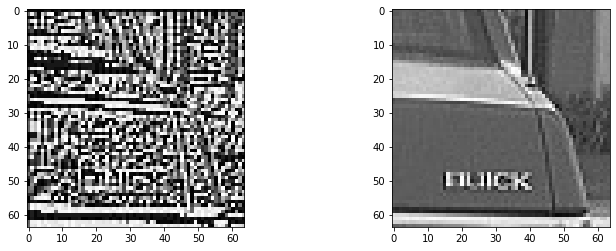

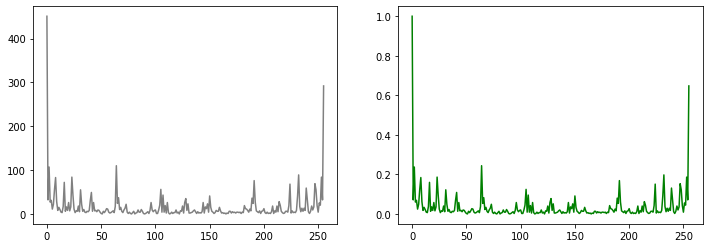

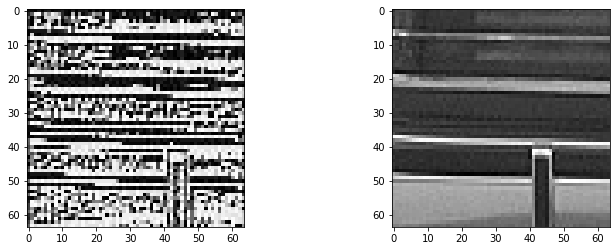

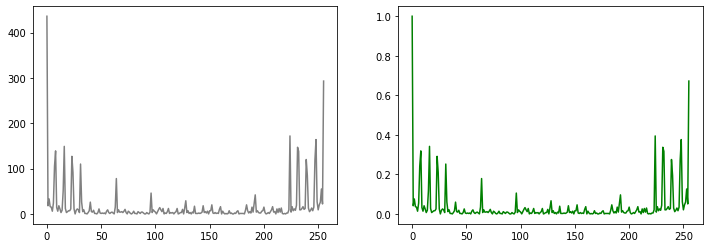

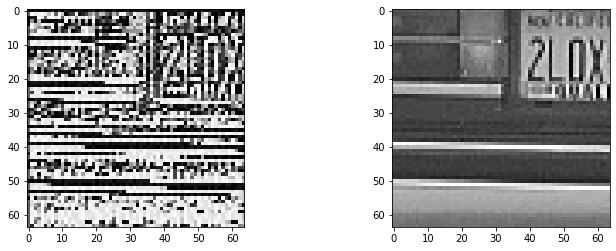

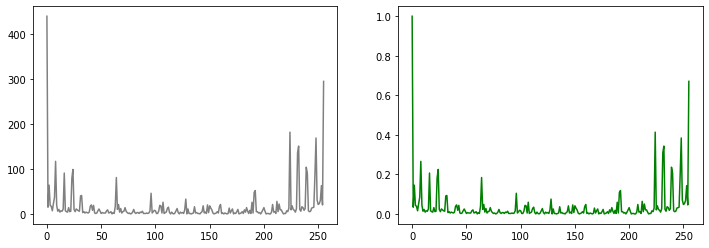

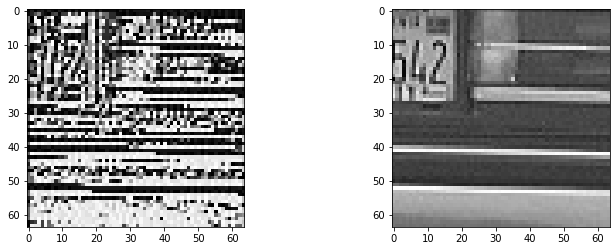

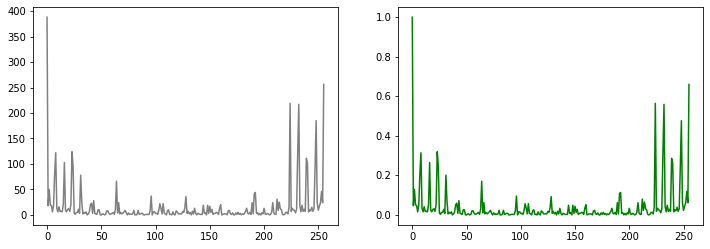

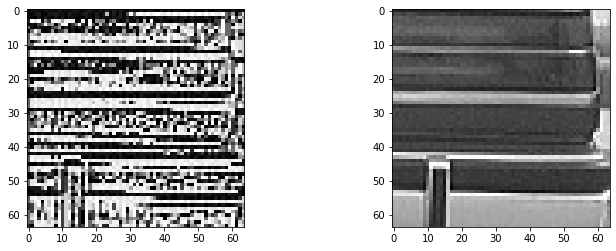

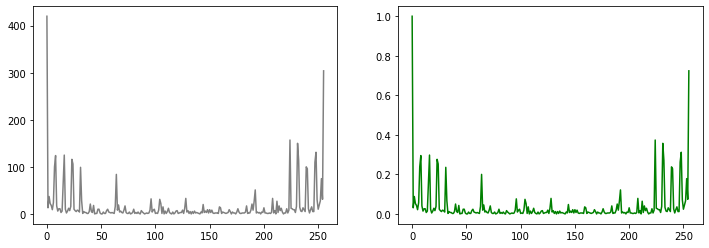

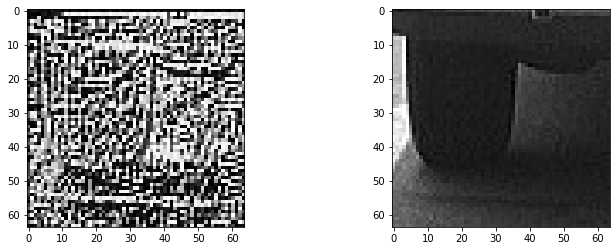

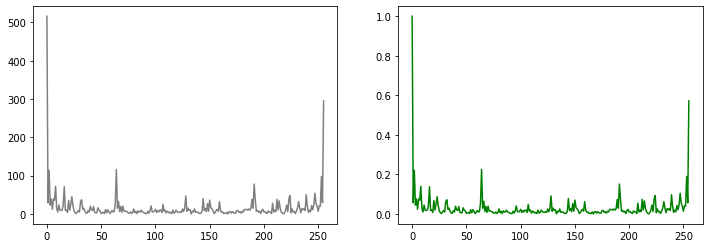

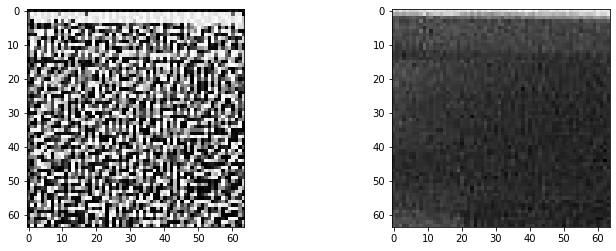

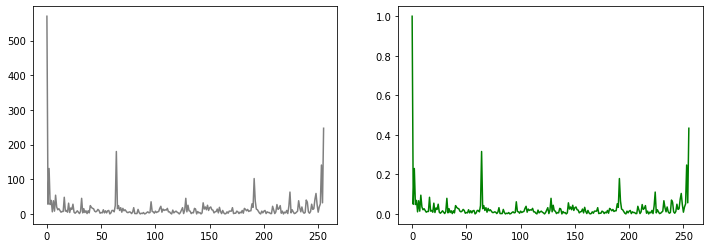

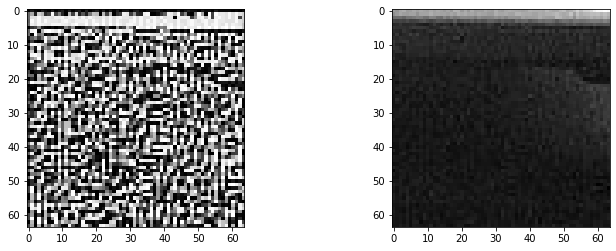

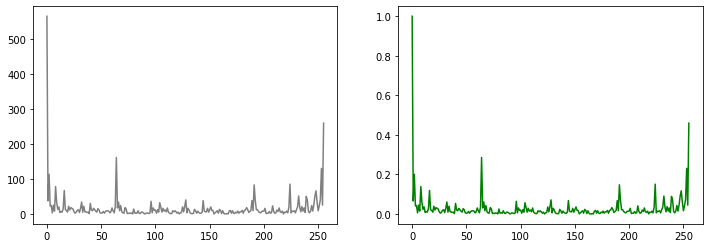

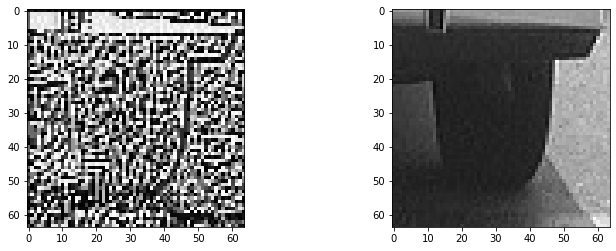

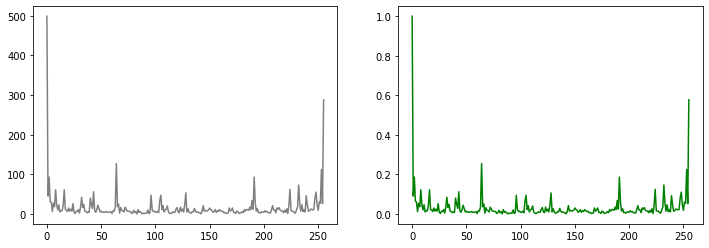

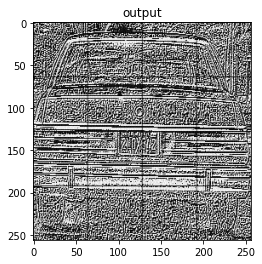

In [285]:
car1_histograms_list = LBP(car1_image,window_size) 

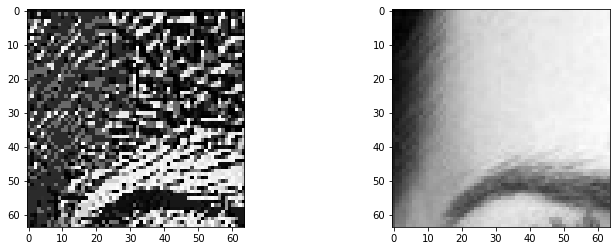

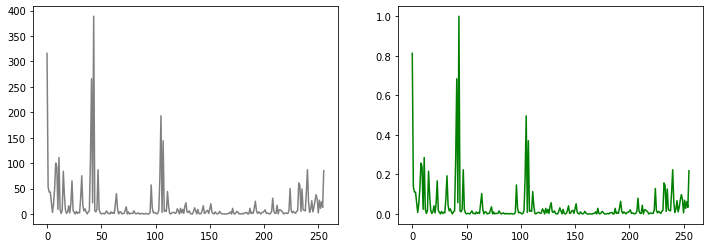

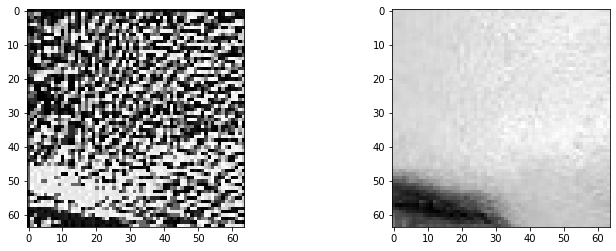

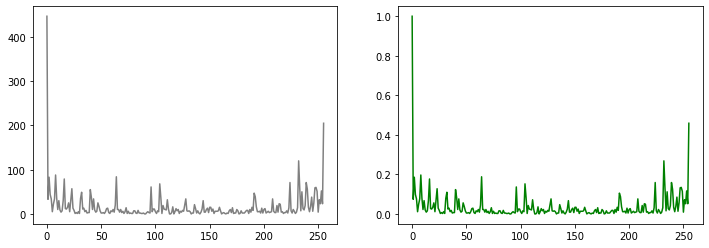

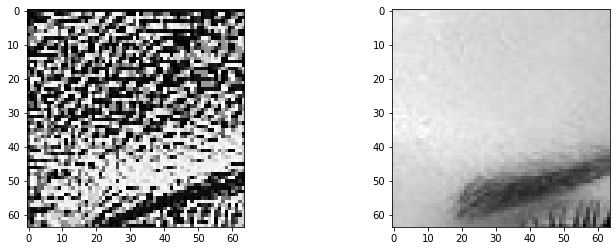

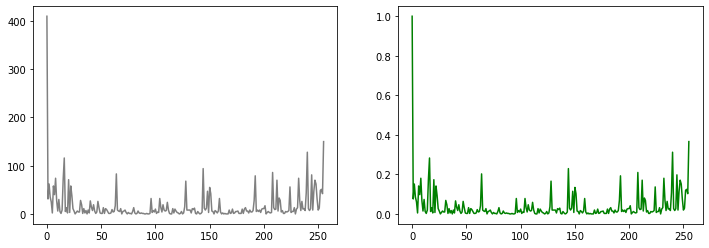

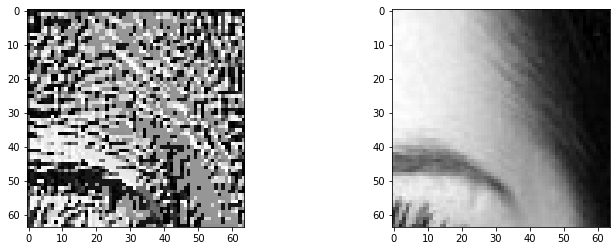

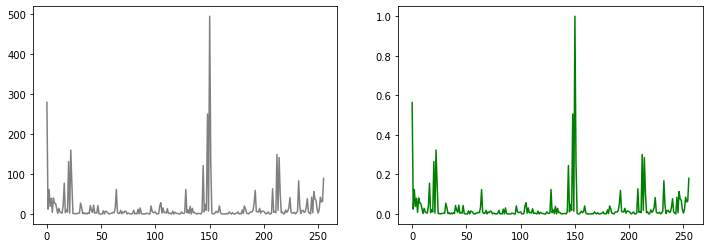

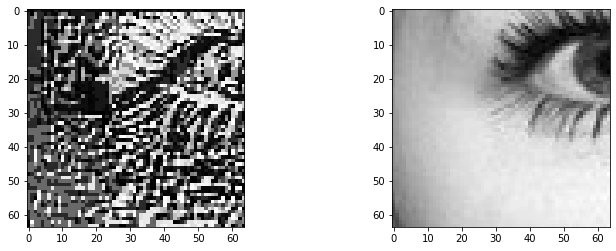

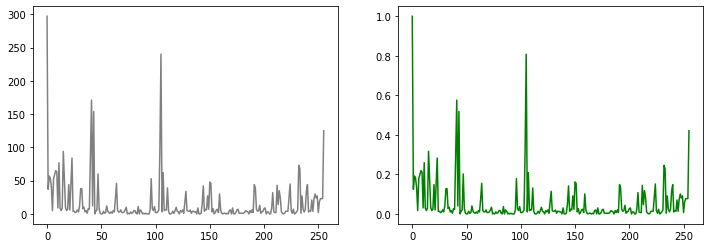

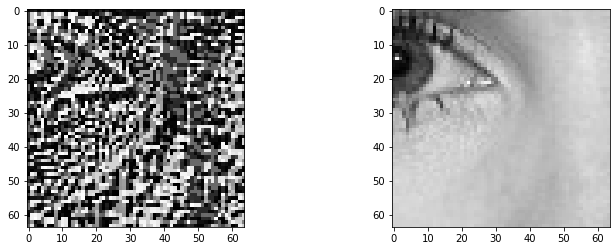

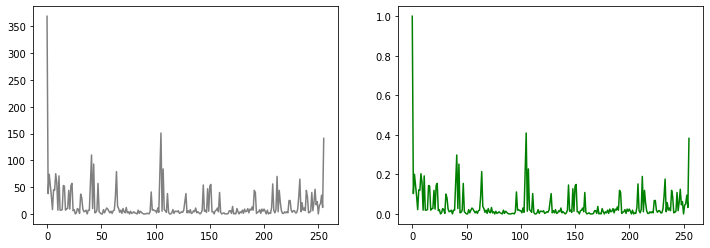

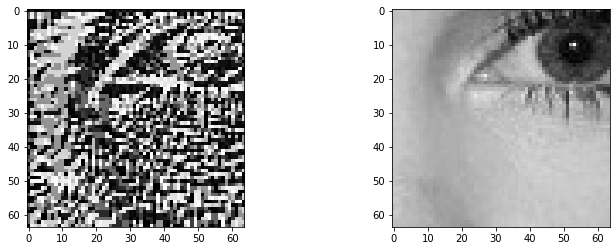

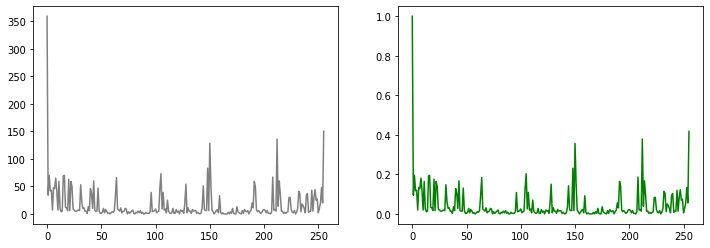

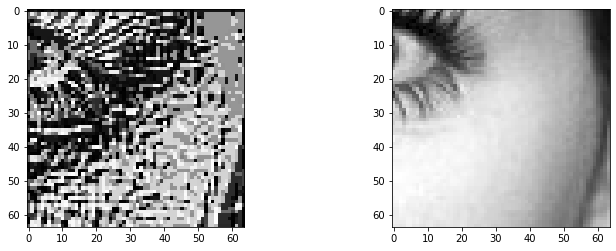

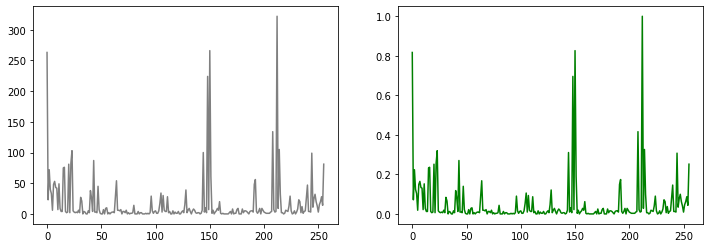

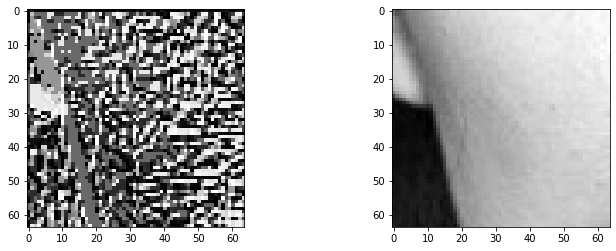

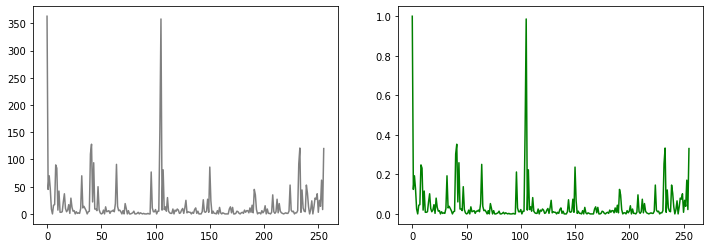

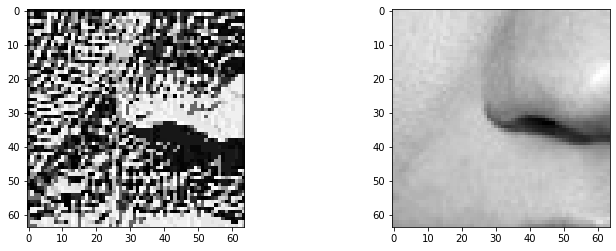

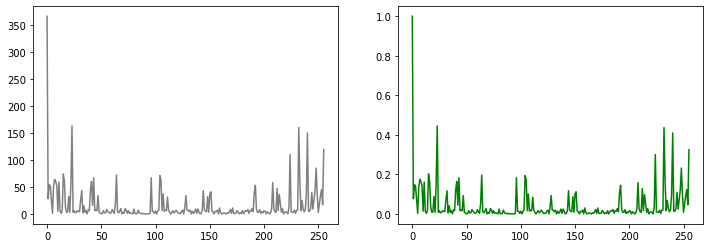

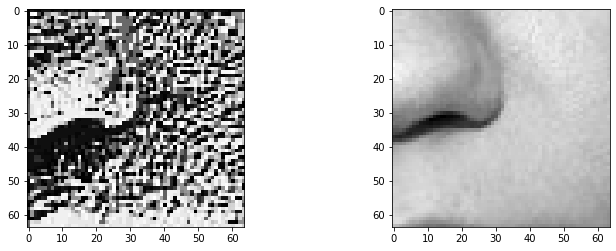

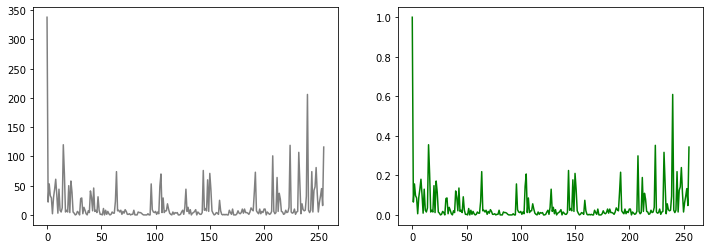

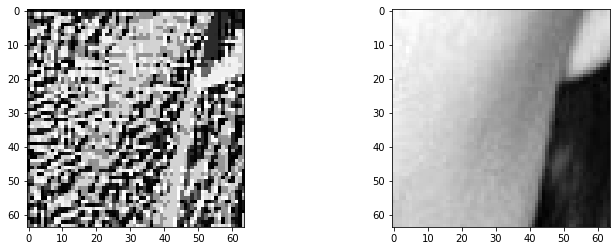

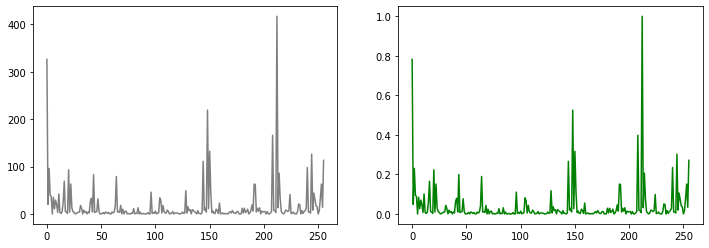

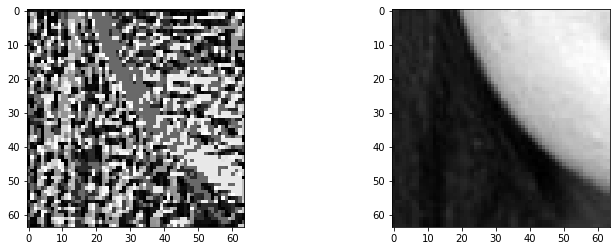

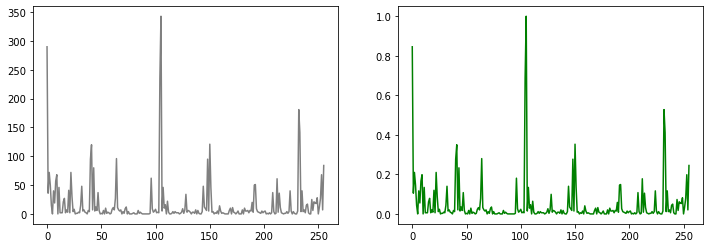

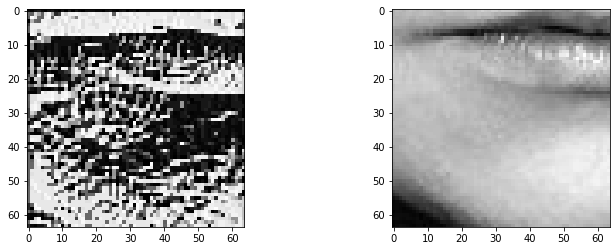

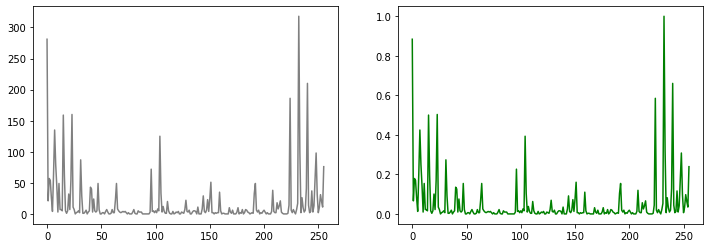

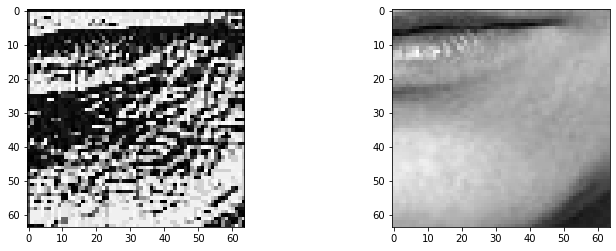

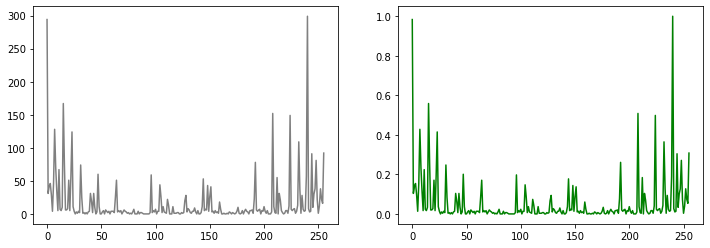

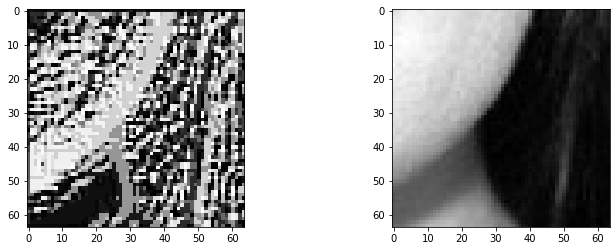

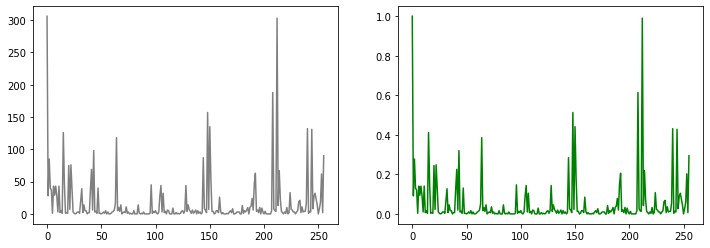

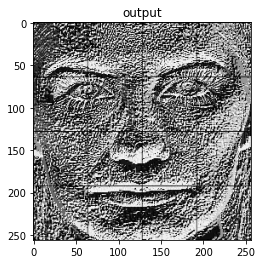

In [286]:
face2_histograms_list = LBP(face2_image,window_size)

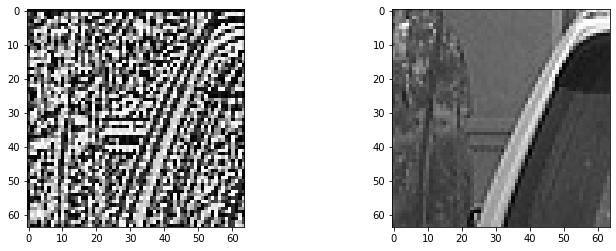

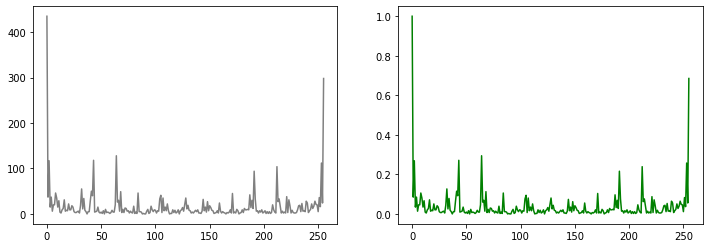

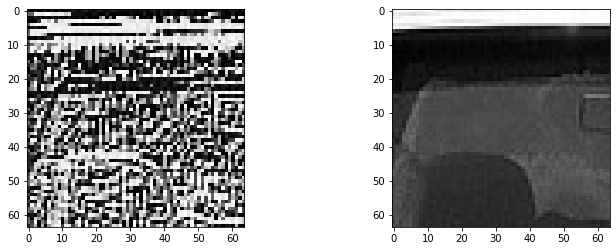

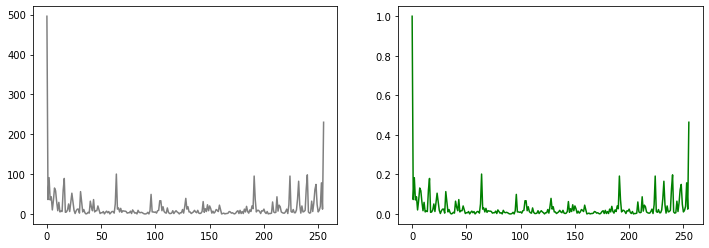

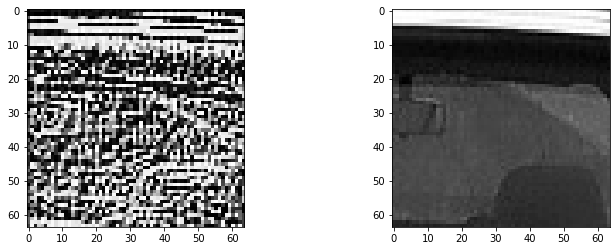

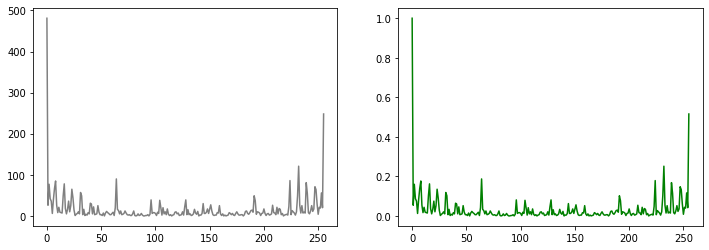

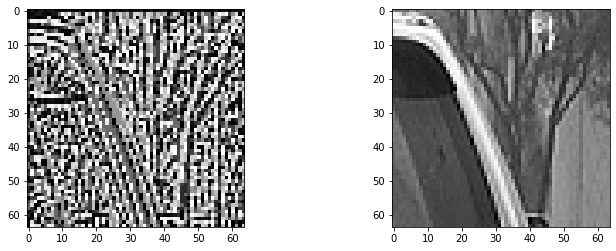

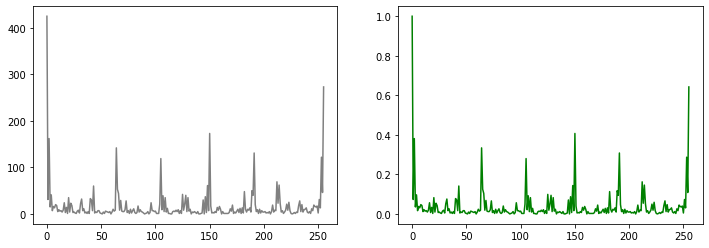

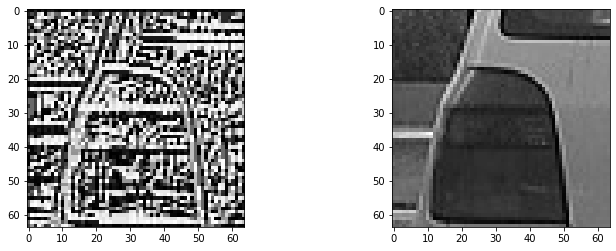

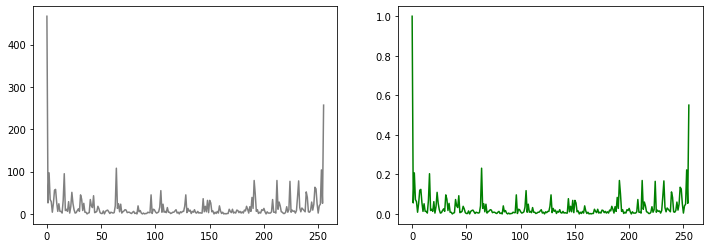

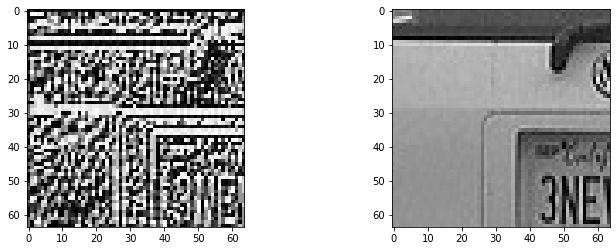

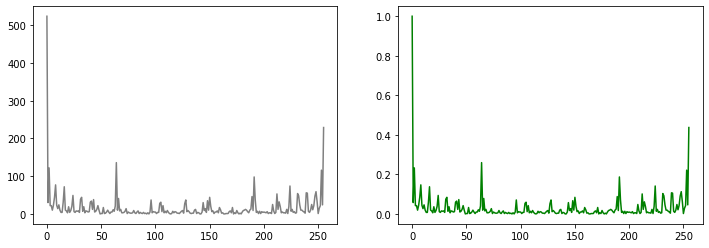

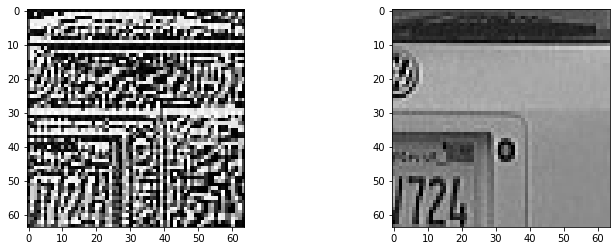

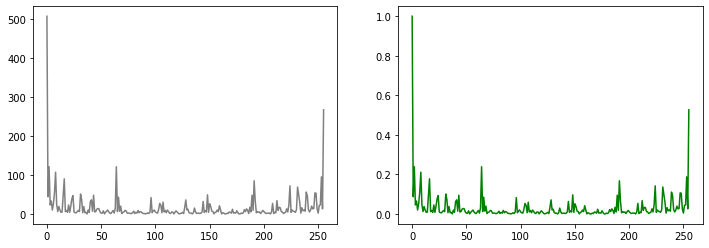

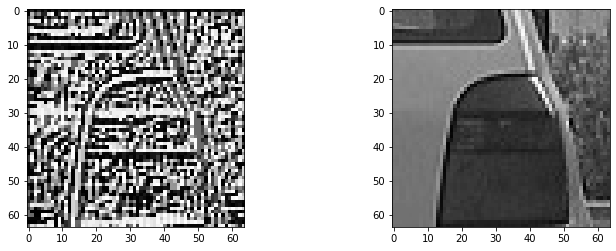

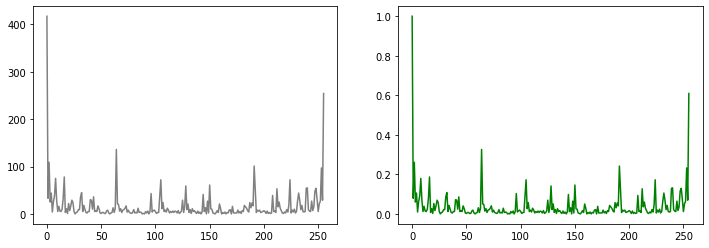

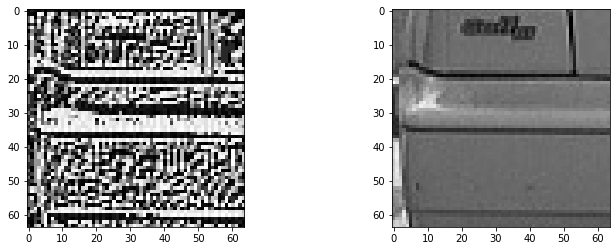

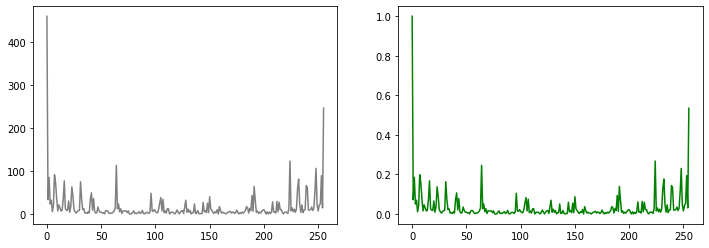

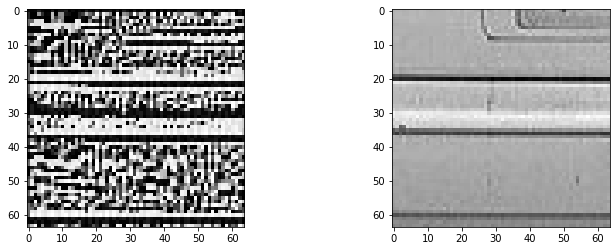

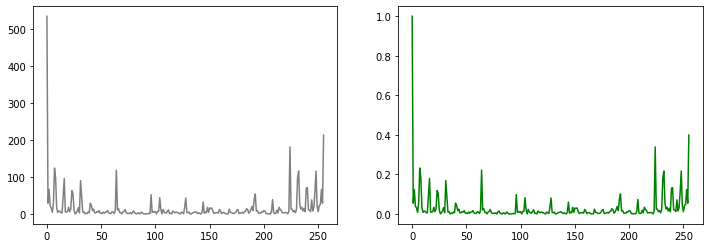

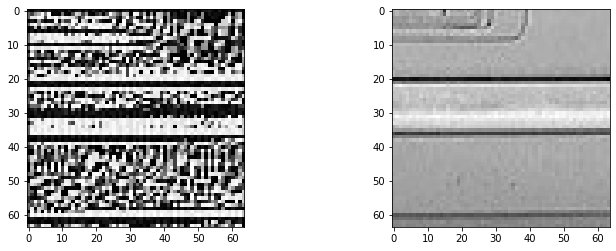

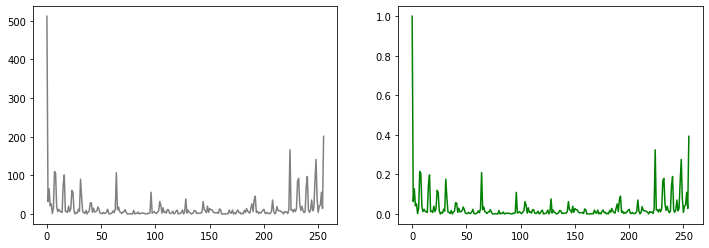

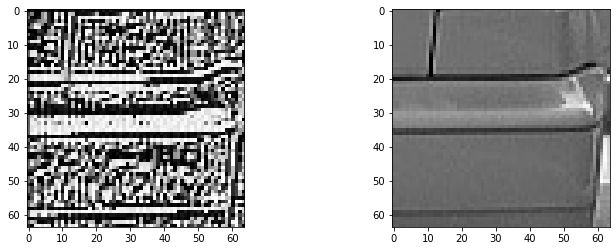

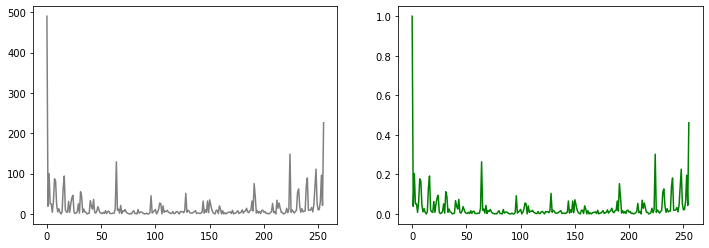

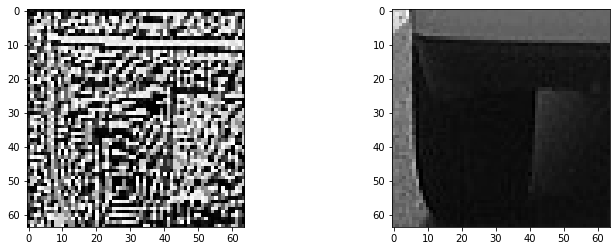

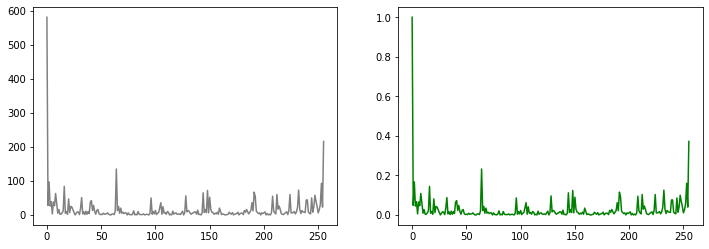

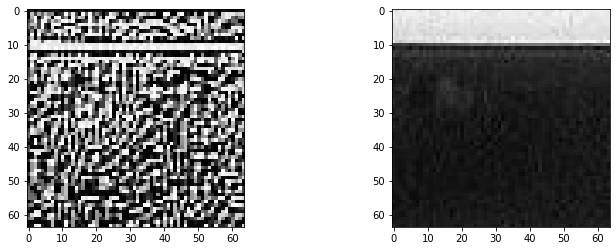

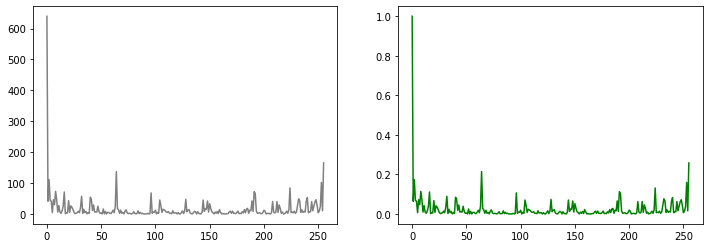

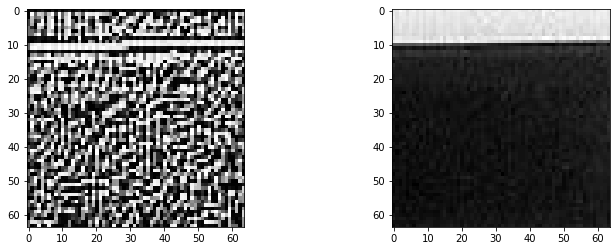

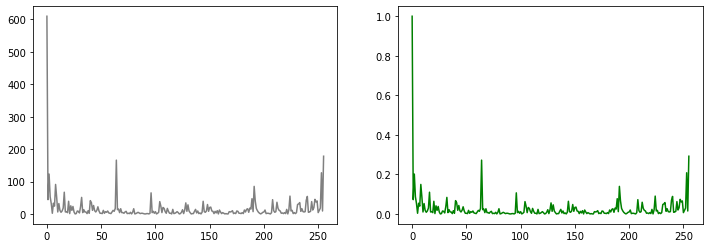

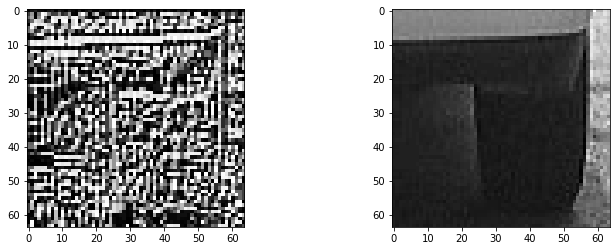

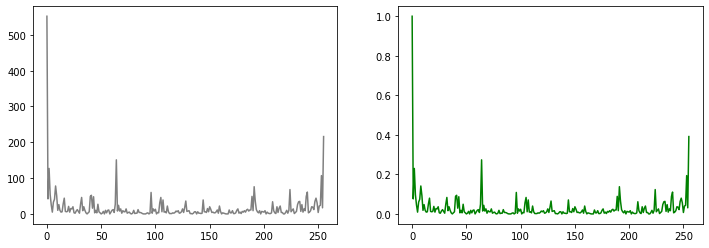

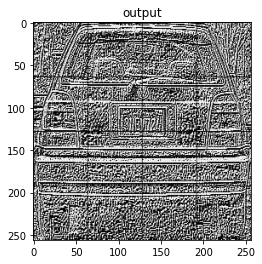

In [287]:
car2_histograms_list = LBP(car2_image,window_size) 

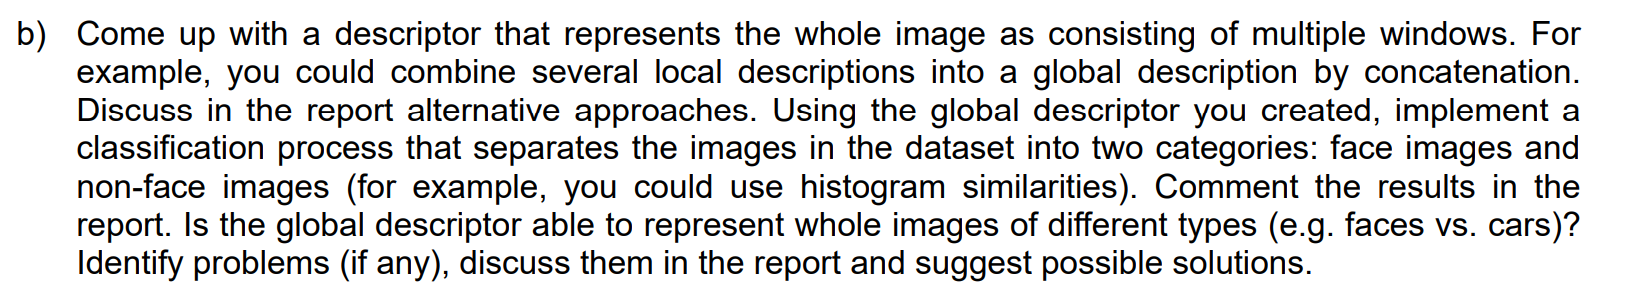


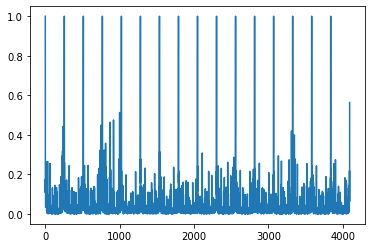

In [288]:
# concatinate histograms in the list of each image to create global descriptor of that image
face1_points = np.concatenate(face1_histograms_list, axis=0)
plt.plot(face1_points)

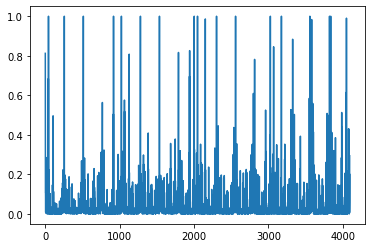

In [289]:
face2_points = np.concatenate(face2_histograms_list, axis=0)
plt.plot(face2_points)

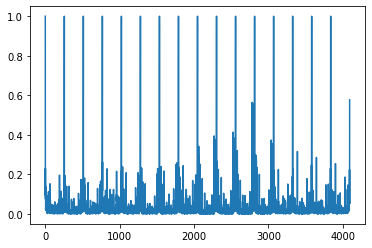

In [290]:
car1_points = np.concatenate(car1_histograms_list, axis=0)
plt.plot(car1_points)

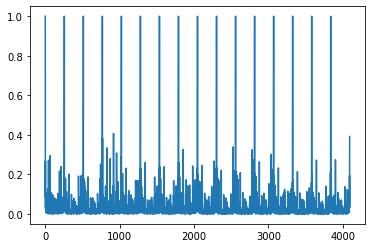

In [291]:
car2_points = np.concatenate(car2_histograms_list, axis=0)
plt.plot(car2_points)

In [292]:
# calculate euclidean_distance of two global feature discriptor (histograms)
def euclidean_distance(histogram_1, histogram_2):
    if  len(histogram_1) == len(histogram_2):
        return np.sqrt(np.sum((histogram_1 - histogram_2)**2))
    print("length is not same")
    return None


In [293]:
euclidean_distance(face1_points, face2_points)

4.692067818689592

In [294]:
euclidean_distance(face1_points, car1_points)

3.0574278018971413

In [295]:
euclidean_distance(face1_points, car2_points)

2.638911851957255

In [296]:
euclidean_distance(car1_points, car2_points)

1.6699275559679934

In [297]:
euclidean_distance(face2_points, car2_points)

4.790148569536871

In [298]:
euclidean_distance(face2_points, car1_points)

5.291679521151825

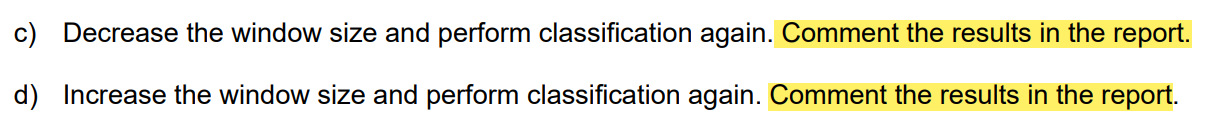